# Exercise sheet 1

__Handout date:__ 18.04.2024  
__Submission deadline:__ 01.05.2024 - 23:59.  
__Submission link:__ https://fz-juelich.sciebo.de/s/4zGXGFzLfkZnl6R  
__Topics:__ Image processing.

Add your answers by editing the marked cells. Keep your answers brief and clear.

## General questions (1P per correct answer)

__--- Question:__ Describe the issue that can arise when sampling a high-frequency continuous signal at discrete sampling points. 

__Answer:__

__Solution:__ High-frequencies in the input signal are not captured when the sampling frequency is too low (Niquist theorem).

__--- Question:__ What is the name of this effect?

__Answer:__

__Solution:__ Aliasing.

__--- Question:__ How is this sampling issue relevant for image acquisition? 

__Answer:__

__Solution:__ Images sample the real world (continuous) at discrete points (photo diodes). If the resolution of a sensor (camera) is too low, high frequencies in the input cannot be captured.

__--- Question:__ Describe one possible approach to address the sampling issue.

__Answer:__ 

__Solution:__ Apply a low-pass filter, for example an average filter.

__---__Question:__ Question:__ What defines a pixel?

__Answer:__

__Solution:__ A coordinate and it's associated intensity value.

## Image transformations (1P per correct answer)

__--- Task:__ Load and plot the camera man image from scikit-image.

__Answer:__ 

__Solution:__

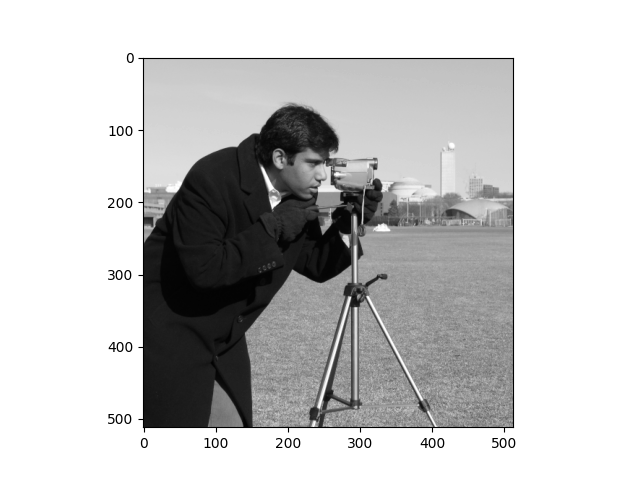

In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
from skimage.data import camera

img = camera()

fig = plt.figure()
plt.imshow(img, cmap="gray");

__--- Task:__ Print the shape, dtype, and value range of the image.

__Answer:__ 

__Solution:__

In [2]:
print(img.shape, img.dtype, img.min(), img.max())

(512, 512) uint8 0 255


__--- Task:__ Plot the histogram of the image.

__Answer:__ 

__Solution:__

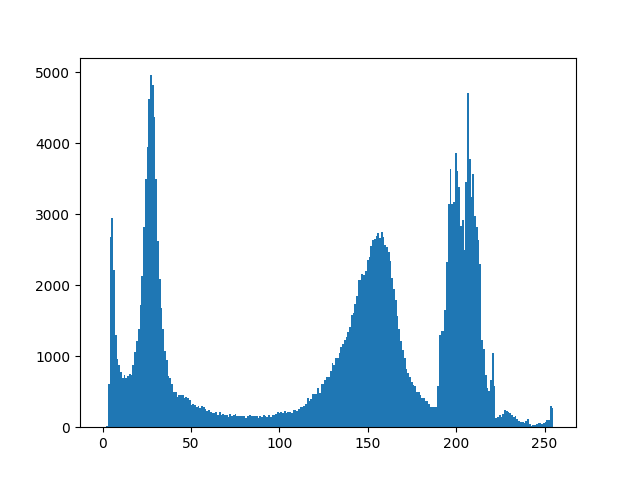

In [3]:
fig = plt.figure()
plt.hist(img.ravel(), bins=256);

Suppose we want to apply a linear transformation $y = ax + b$ to all pixel intensities $x$ in the image.

__--- Question:__ What is the effect of the parameter $a$? 

__Answer:__ 

__Solution:__ Contrast adjustment.

__--- Question:__ What is the effect of the parameter $b$? 

__Answer:__ 

__Solution:__ Brightness adjustment.

__--- Task:__ Linearly transform the camera image with all combinations of the parameters $a=[0.5, 1.0, 2.0]$ and $b=[-42, 0, +42]$. Visualize the results. Ensure that the effect of the transformation is visible in the images!

__Answer:__ 

__Solution:__ See below.

__--- Task:__ Plot the histograms of the transformed images. __Tip:__ Use `inset_axes` in matplotlib to overlay the histogram onto the image.

__Answer:__ 

__Solution:__

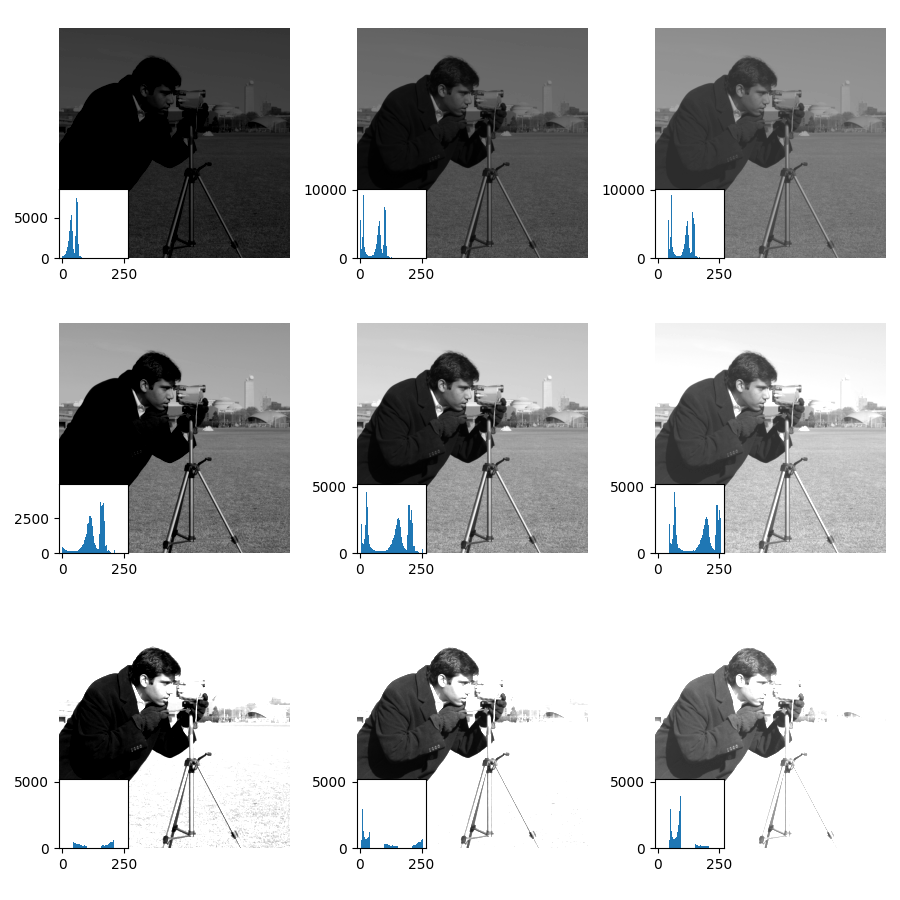

In [4]:
from itertools import product

a = [0.5, 1.0, 2.0]
b = [-42, 0, 42]
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for (ai, bi), ax in zip(product(a, b), axes.ravel()):
    ax.set_axis_off()
    imgi = ai * img + bi
    ax.imshow(imgi, vmin=0, vmax=255, cmap="gray")
    axi = ax.inset_axes((0, 0, 0.3, 0.3))
    axi.hist(imgi.ravel(), range=(0, 255), bins=256)
fig.tight_layout()

__--- Question:__ When linearly transforming an image, which issues can be expected regarding the used data type and visualization?

__Answer:__ 

__Solution:__ Overflow of data types, incorrect specification of minimum and maximum values.

## Homogenous coordinates (1P per correct answer)

__--- Task:__ Represent the 2D point with coordinates $p=[2, 1]$ in homogenous coordinates.

__Answer:__ 

__Solution:__

In [5]:
import numpy as np
p = np.array([2, 1, 1])

__--- Task:__ Define a transformation matrix $A$ that translates the point $p$ by $[1, 2]$

__Answer:__ 

__Solution:__

In [6]:
A = np.eye(3)
A[:2,-1] = (1, 2)
A

array([[1., 0., 1.],
       [0., 1., 2.],
       [0., 0., 1.]])

__--- Task:__ Use $A$ to transform the point $p$.

__Answer:__ 

__Solution:__

In [7]:
y = A @ p
y

array([3., 3., 1.])

__--- Task:__ Consider the following list of 2D points $X$. Transform all points using the matrix $A$ using __a single__ matrix multiplication.

In [8]:
X = np.arange(20).reshape(10, 2)
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

__Answer:__ 

__Solution:__

In [9]:
Y = (A @ np.concatenate((X, np.ones((len(X), 1))), axis=1).T).T
Y[:, :-1]

array([[ 1.,  3.],
       [ 3.,  5.],
       [ 5.,  7.],
       [ 7.,  9.],
       [ 9., 11.],
       [11., 13.],
       [13., 15.],
       [15., 17.],
       [17., 19.],
       [19., 21.]])

__--- Task:__ Define a rotation matrix $R$ with rotation angle $\theta=\pi$.

__Answer:__ 

__Solution:__

In [10]:
R = np.eye(3)
R[0, 0] = R[1, 1] = np.cos(np.pi)
R[0, 1] = R[1, 0] = np.sin(np.pi)
R[0, 1] *= -1
R

array([[-1.0000000e+00, -1.2246468e-16,  0.0000000e+00],
       [ 1.2246468e-16, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

__--- Task:__ Create a matrix $S$ that first translates a point $p$ by $[1, 2]$ and then rotates it by $\pi$.

__Answer:__ 

__Solution:__

In [11]:
S = R @ A
S

array([[-1.0000000e+00, -1.2246468e-16, -1.0000000e+00],
       [ 1.2246468e-16, -1.0000000e+00, -2.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

__--- Question:__ Briefly define the properties of the following types of transformations by describing how the spatial relationship of lines is affected by the respective transformation (1P per correct answer).   

__Answer:__ 

- Rigid transformation:
- Similarity transformation:
- Affine transformation:
- Perspective transformation:

__Solution:__

- Rigid transformation: preserves lenghts (no scaling)
- Similarity transformation: preservers angles (no shearing)
- Affine transformation: preserves parallelism (no perspective)
- Perspective transformation: preserves straight lines (no non-linear deformation)

## Rotating an image (1P per correct answer)

The goal of this task is to rotate in image.  
__Note:__ In practice, you would use more efficient implementations, but for educational purposes, we will here implement the rotation ourselves.

__--- Task:__ Define a rotation matrix $R$ with rotation angle $\theta=45°$. 

__Answer:__ 

__Solution:__

In [12]:
theta = np.deg2rad(45)
R = np.eye(3)
R[0, 0] = R[1, 1] = np.cos(theta)
R[0, 1] = R[1, 0] = np.sin(theta)
R[0, 1] *= -1
R

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

__--- Task:__ Create a list of points containing all pixel coordinates of the camera man image you loaded before. __Note:__ Mind the order of $x$ and $y$!

__Answer:__ 

__Solution:__

In [13]:
y_size, x_size = img.shape
x_coords, y_coords = np.mgrid[:x_size, :y_size]
points = np.stack([x_coords.ravel(), y_coords.ravel()], axis=1)
points.shape

(262144, 2)

__--- Task:__ Convert the points to homogenous coordinates.

__Answer:__ 

__Solution:__

In [14]:
points_h = np.concatenate([points, np.ones((len(points), 1))], axis=1)
points_h.shape

(262144, 3)

__--- Task:__ Apply the transformation matrix $R$ to the list of points.

__Answer:__ 

__Solution:__

In [15]:
points_t = (R @ points_h.T).T
points_t.shape

(262144, 3)

__--- Task:__ Create the transformed image by writing each pixel value to the transformed pixel position.  
__Notes:__
- Use rounding to obtain proper values for indexing.
- Remember to handle pixels that end up outside the target image.

__Answer:__ 

__Solution:__

In [16]:
output_img = np.zeros_like(img)
# round points
points_t = points_t.round().astype(int)
# only include points that end up inside the target image
inside_mask = (points_t[:, 0] >= 0) & (points_t[:, 0] < x_size) & (points_t[:, 1] >= 0) & (points_t[:, 1] < y_size)
points_t_inside = points_t[inside_mask, :]
# get coordinate
x_coords_t, y_coords_t, _ = points_t_inside.T
x_src, y_src = points[inside_mask, :].T
# Attention: flip x and y again!
output_img[y_coords_t, x_coords_t] = img[y_src, x_src]

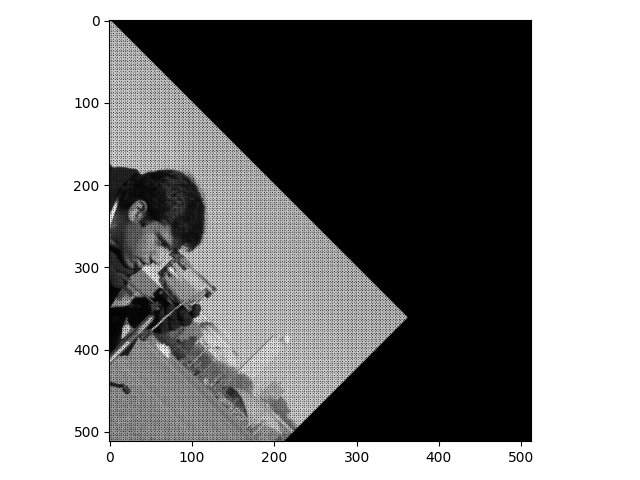

In [17]:
fig = plt.figure()
plt.imshow(output_img, vmin=0, vmax=255, cmap="gray")
fig.tight_layout()

__--- Question:__ The resampled image contains a fine pattern of black pixels. Explain the reason for this.

__Answer:__ 

__Solution:__ The forward transformation does not ensure that every output pixel actually gets a value.

__--- Question:__ What would be a suitable approach to prevent these artifacts?

__Answer:__ 

__Solution:__ Compute backward transformation, lookup input pixel for each input pixel. Use proper interpolation.

__--- Task:__ The used rotation matrix rotates the image around it's corner. Define a transformation matrix that rotates around the image center.

__Answer:__ 

__Solution:__

In [18]:
# shift from center 
T = np.eye(3)
T[:2, -1] = (-img.shape[1], img.shape[0])

# apply (from right to left): shift center to origin, rotate, shift center back to center.
A = np.linalg.inv(T) @ (R @ T)
A

array([[   0.70710678,   -0.70710678, -212.07734394],
       [   0.70710678,    0.70710678, -512.        ],
       [   0.        ,    0.        ,    1.        ]])

## Image filtering (1P per correct answer)

__--- Question:__ Which mathematical operation is often used for image filtering?

__Answer:__ 

__Solution:__ Convolution.

__--- Task:__ Define a $3x3$ linear filter that computes the sum of a $3x3$ pixel grid at each position. 

__Answer:__ 

__Solution:__

In [19]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

__--- Task:__ Define a $3x3$ linear filter that computes the average of a $3x3$ pixel grid at each position. 

__Answer:__ 

__Solution:__

In [20]:
h = np.ones((3, 3))
h /= h.sum()
h

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

__--- Question:__ Which of the following filters is linear?

__Answer:__ 

- Average:
- Sum:
- Median:
- Gaussian:

__Solution:__

- Average: yes
- Sum: yes
- Median: no
- Gaussian: yes

__--- Question:__ What is the technical advantage of linear filters compared to non-linear  filters?

__Answer:__ 

__Solution:__ Linear filter usually faster to compute. For example, GPUs enable very fast computation of linear filters.